# Exercício 2 - 07/03/2019

## Prazo de Entrega: 07/03 - 23h59
  
## Equipe:
- Bruno Gomes Coelho  - 9791160
- Bruno Mendes da Costa - 9779433

## Datasets da prática:
- teste1.txt

## Produzido e testado com o Google Colaboratory
https://colab.research.google.com/

# Dataset: teste1.txt

In [11]:
# Download do dataset escolhido
!wget "https://www.dropbox.com/s/r8hyqy1vzoq1anq/test1.txt?dl=1" -O teste1.txt

--2019-03-07 14:48:05--  https://www.dropbox.com/s/r8hyqy1vzoq1anq/test1.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/r8hyqy1vzoq1anq/test1.txt [following]
--2019-03-07 14:48:06--  https://www.dropbox.com/s/dl/r8hyqy1vzoq1anq/test1.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1c3b665d9ffe82b5fd188e4eca.dl.dropboxusercontent.com/cd/0/get/AcpS1tbTbtlcSLjp0VCPmoNZ1UYJHEzjgAnVetAZZgwpaO4ZG3ioKjFwdlWYcjmLoAR8fu_WGaVf2U-qoY_Y47arYU2XHm-ncbeKAznKKUD8CA/file?dl=1# [following]
--2019-03-07 14:48:06--  https://uc1c3b665d9ffe82b5fd188e4eca.dl.dropboxusercontent.com/cd/0/get/AcpS1tbTbtlcSLjp0VCPmoNZ1UYJHEzjgAnVetAZZgwpaO4ZG3ioKjFwdlWYcjmLoAR8fu_WGaVf2U-qoY_Y47arYU2XHm-ncbeKAznKKUD8CA/file?dl=1
Resolving uc1c3b665d9

# Imports

In [0]:
# Atualizando seaborn para a mais nova versão
!pip3 install -qU seaborn

In [0]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
#warnings.filterwarnings('ignore')
sns.set()
plt.rcParams['figure.figsize'] = [15, 10]

# Aula 03 - Exercício 02
## Aproximação de funções (Regressão)

Para esse exercício, carregue a base de dados `teste1.txt`. Os dados possuem 14 variáveis, organizados em 14 colunas. A 15ª coluna representa o valor da função. Os dados estão separados pelo caractere `\t`.


Note que os dados não podem ser lidos linha a linha, pois existem linhas que foram quebradas antes das 14 variáveis serem descritas.

* Leia os dados e armazene-os em uma tabela.
  * Dica: Converta sua tabela em uma estrutura do tipo pandas.DataFrame





In [14]:
header = None
matrix = []
with open("teste1.txt") as f:
    nums = []
    for idx, line in enumerate(f.read().splitlines()):
        if idx == 0:
            header = line[1:].split("\t")
        elif idx > 2:
            nums += [float(x) for x in line.split("\t") if x]
            if len(nums) == 15:
                matrix.append(nums)
                nums = []
            

df = pd.DataFrame(matrix, columns=header)
df.head()

,VL,VM,VP,M,VMVL,VMVM,VMVP,VMM,T,H,Vv,DirV,MHE,MLR,CO
0,1849.0,209.0,62.0,245.0,11.75,13.43,7.83,15.67,32.5,48.0,1.15,115.0,4.01,30.18,7.1
1,580.0,48.0,88.0,137.0,8.60,8.60,7.20,10.70,29.9,42.0,1.40,20.0,17.69,13.70,5.9
2,1438.0,207.0,108.0,386.0,11.80,9.40,8.60,13.40,37.1,28.0,0.60,170.0,3.49,38.37,9.6
3,651.0,58.0,23.0,46.0,9.60,13.70,13.70,12.00,15.7,64.0,0.00,159.0,5.33,32.97,7.4
4,623.0,55.0,82.0,141.0,5.10,4.50,6.60,7.80,27.4,46.0,0.70,27.0,17.69,13.70,3.7


In [15]:
# Não há nenhum valor nulo, os dados foram corretamente lidos
df.isnull().sum().sum()

0



---

*   Calcule a matriz de correlação dos dados e escolha a variável mais relevante.
  
* Dica 1: Se os dados estiverem em formato de DataFrame da biblioteca pandas, basta fazer dataset.corr() para gerar a matriz de correlação. Para facilitar ainda mais a visualização, você pode utilizar a função heatmap da biblioteca seaborn, passando o parâmetro a matriz de correlação calculada e `annot=True` para exibir os valores no heatmap.
* Dica 2: Se o heatmap estiver muito pequeno, é possível alterar o tamanho padrão das figuras do matplotlib, através do comando `plt.rcParams['figure.figsize'] = [w, h]`, onde` [w, h]` é a largura/altura da imagem respectivamente (um tamanho bom para leitura é 10 e 5)

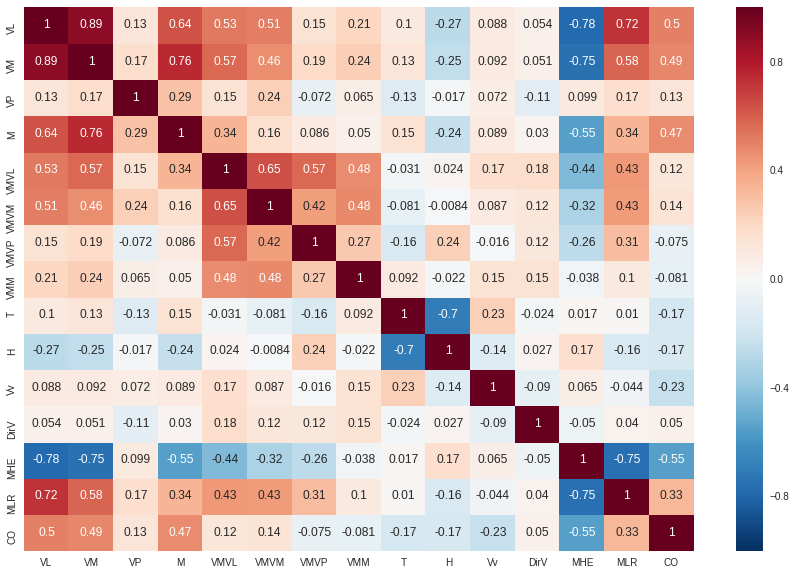

In [16]:
sns.heatmap(df.corr(), annot=True)

In [0]:
# vamos escolher a feature VL - a que tem a correlação mais alta
col = "VL"
target = "CO"



---



*   Com base na variáveis escolhida via matriz de correlação, aproxime a função por uma reta e calcule seu erro quadrático médio

* Dica 1: Utilize os pacotes importados para realizar a aproximação por função linear e para calcular o erro quadrático médio. 
* Dica 2: Para criar um novo conjunto com as variáveis selecionadas,  inicialize um `DataFrame()` do pandas passando como parâmetro as colunas do DataFrame original concatenadas com a função `_c` da biblioteca numpy: 

```python
pandas.DataFrame(numpy.c_[dataSet['Variavel 1'], dataSet['Variavel 2']], columns = ['Variavel 1', 'Variavel 2'])
```





MSE:  6.435661565160081


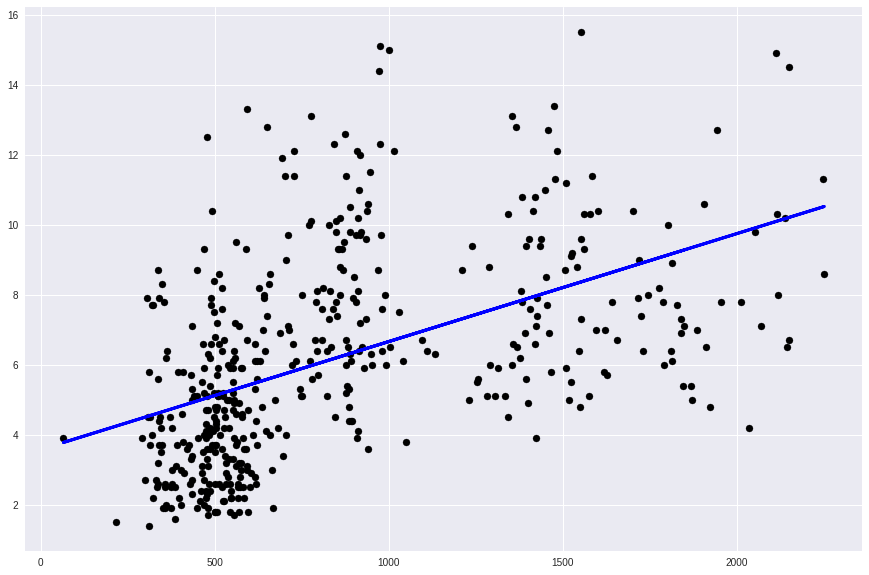

In [18]:
lr = LinearRegression()
lr.fit(df[[col]], df[target])
y_pred = lr.predict(df[[col]])

plt.scatter(x=df[col], y=df[target], color="black")
plt.plot(df[col], y_pred, color="blue", linewidth=3)

print("MSE: ", mean_squared_error(df[target], y_pred))



---



*  Agora calcule uma aproximação por uma função quadrática. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear ou via função quadrática

  * Dica: Utilize a biblioteca já importada para *transformar* os dados para uma regressão polinomial (func. quadrática). Mais informações sobre como o processo podem ser encontradas dentro da pasta do projeto.



In [19]:
lr_2 = LinearRegression()
transformed = PolynomialFeatures(degree=2).fit_transform(df[[col]])

lr_2.fit(transformed, df[target])
y_pred_2 = lr_2.predict(transformed)

print("MSE:", mean_squared_error(df[target], y_pred_2))

MSE: 5.903345153704277


Como pode ser observado acima, a aproximação via função quadrática produz um erro menor que  via função linear.



---



*   Por fim, calcule uma aproximação por uma função cúbica. Verifique qual produz o menor erro quadrático médio: a aproximação via função linear, via função quadrática ou via função cúbica.


In [20]:
lr_3 = LinearRegression()
transformed = PolynomialFeatures(degree=3).fit_transform(df[[col]])

lr_3.fit(transformed, df[target])
y_pred_3 = lr_3.predict(transformed)

print("MSE:", mean_squared_error(df[target], y_pred_3))

MSE: 5.824902549195467


Como se pode observar, a que produz o menor erro das 3 (linear, quadrática e cúbica) é a aproximação via função cúbica.